In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import model_based_agent as mba
import tab_agents as tab

In [51]:
'''
At the end of this script, there will be files in a timestamped folder:
1. Saved trajectory combined with old ('..total.pkl'). Dataframe
2. Saved individual trajectory files ('..eval_start.pkl', '..[ep].pkl'). Dict
3. Averaged agent from each each full worm episode ('..[ep]_agent.pkl')

In folder from 12_01_dropoutmodel/Data:
18-12-13-31 was a failed debugging trial
18-12-13-49 empty plate debugging trial
18-12-15-00 worm run from nogap_traj_df.pkl
18-12-16-39 continuation of 15-00 above

In folder 12_19_realworms/Data:
First three are trials; last three are init collection
19-12-18-26 test run w 50-step eps
19-12-18-40 ''
19-12-18-50 ''
20-12-14-25
20-12-14-28
20-12-14-58
'''
fbase0 = './../12_01_dropoutmodel/Data/'
fbase1 = './../12_19_realworms/Data/'


In [79]:
trial = 'Reals18-12-16-39/realworm_'
with open(fbase0+trial+'total_params.pkl','rb') as f:
    pars = pickle.load(f)
with open(fbase0+trial+'total.pkl','rb') as f:
    totals = pickle.load(f)
with open(fbase0+trial+'1_agent.pkl','rb') as f:
    agt0 = pickle.load(f)
with open(fbase0+trial+'5_agent.pkl','rb') as f:
    agt1 = pickle.load(f)
with open(fbase0+trial+'5.pkl','rb') as f:
    traj = pickle.load(f)

In [58]:
print(len(traj['reward']))
print(pars)
print(agt1.epsilon,agt1.alpha,agt1.gamma)

1200
{'reward_ahead': 10, 'timestep_gap': 1, 'prev_act_window': 3, 'jump_limit': 100}
0.050000000000000044 0 0


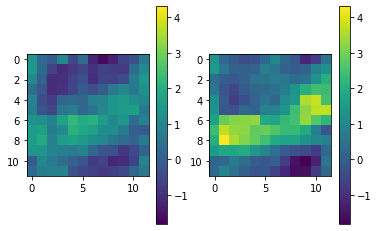

In [71]:
fig,ax = plt.subplots(1,2)
agt = agt0
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

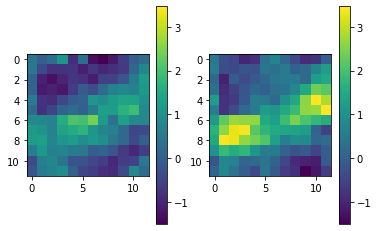

In [60]:
fig,ax = plt.subplots(1,2)
agt = agt1
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

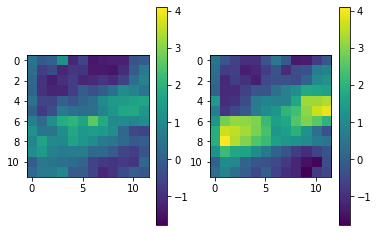

In [5]:
fig,ax = plt.subplots(1,2)
agt = agt1
for i in range(2):
    vmin = np.min(agt.Qtab)
    vmax = np.max(agt.Qtab)
    img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
    fig.colorbar(img,ax=ax[i])

In [76]:
np.sum(np.sign(agt.Qtab[:,1]-.6-agt.Qtab[:,0]))

-2.0

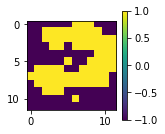

In [77]:
plt.figure(figsize=(2,2))
plt.imshow(np.sign((agt.Qtab[:,1]-.6-agt.Qtab[:,0]).reshape(12,12)))
plt.colorbar();

In [81]:
dict_names = [
    # First worm
    'Data/traj12-11-2020_19-04-41.pkl', #none
    'Data/traj12-11-2020_19-14-38.pkl', #none
    'Data/traj12-11-2020_19-24-30.pkl', #xlim 800
    'Data/traj12-11-2020_19-35-31.pkl', #none # Seems like an especially bad dataset. Actually ruined all the others

    # Second worm
    'Data/traj12-11-2020_19-55-19.pkl', #none
    'Data/traj12-11-2020_20-05-11.pkl', #none
    'Data/traj12-11-2020_20-15-17.pkl', #none
    'Data/traj12-11-2020_20-25-06.pkl', #xlim 1430

    # Third worm
    'Data/traj30-10-2020_18-14-00.pkl', #none
    'Data/traj30-10-2020_18-34-10.pkl', #none

    # Fourth worm
    'Data/traj02-11-2020_15-53-56.pkl', #none 
    'Data/traj02-11-2020_16-14-45.pkl', #none 

    # Fifth worm
    'Data/traj03-11-2020_14-46-45.pkl', #none
    'Data/traj03-11-2020_15-08-07.pkl', #none
    
]
dict_names = ['./../10_30_model/'+dn for dn in dict_names]
for i in range(6):
    dict_names.append('./../12_01_dropoutmodel/Data/Reals18-12-15-00/realworm_'+str(i)+'.pkl')
    dict_names.append('./../12_01_dropoutmodel/Data/Reals18-12-16-39/realworm_'+str(i)+'.pkl')

dh = mba.DataHandler()
dh.add_dict_to_df(dict_names, 
                 reward_ahead=10,
                 timestep_gap=1,
                 prev_act_window=1,
                 jump_limit=100)
#dh.save_dfs('noprocs.pkl')

In [3]:
dh = mba.DataHandler()
dh.load_df('noprocs.pkl')

1. Multiple models, individual agents
2. Multiple models, agent seeds
3. One model, agent seeds

In [18]:
def test_agents(Qtab):
    # Evaluation learner
    agt = tab.Q_Alpha_Agent(gamma=.25,epsilon=0.01,alpha=0.01) 
        # The HPs shouldn't be used
    agt.Qtab = Qtab
    test_lnr = mba.Learner(agt, 'test_learner', worm_pars={'num_models':1,'frac':1},num_steps=1000,eval_steps=5000)
    dh = mba.DataHandler()
    dh.load_df('noprocs.pkl')
    test_lnr.make_mod_and_env(dh)
    return lnr.eval()

def plot_qtabs(agt,vmin=None,vmax=None):
    fig,ax = plt.subplots(1,2)
    for i in range(2):
        img = ax[i].imshow(agt.Qtab[:,i].reshape(12,12),vmin=vmin,vmax=vmax)
        fig.colorbar(img,ax=ax[i])

# 0. Finding decent HPs for home tests

In [82]:
agts = []
agts.append(tab.Q_Alpha_Agent(
    gamma=0.25,
    epsilon=0.01,
    alpha=0.01,))
lnr = mba.Learner(agts[0],'noprocs',
                 worm_pars={'num_models':1,'frac':1},
                 num_steps=1000,
                 eval_steps=1000)
lnr.make_mod_and_env(dh)
eval_r = np.mean([lnr.eval_ep() for i in range(50)])

On model 0


In [83]:
eval_r

0.5513040921798945

In [84]:
evals = []
for i in range(10):
    print(i)
    Qtab = lnr.learn(dh,learn_limit=1000)
    evals.append(np.mean([lnr.eval_ep() for i in range(50)]))

0
1
2
3
4
5
6
7
8
9


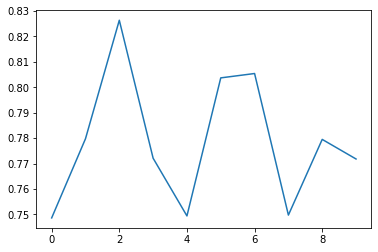

In [85]:
plt.plot(evals) #gamma 0.25, ep .01, alpha .01
# started at 

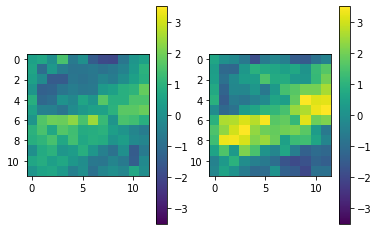

In [91]:
plot_qtabs(agts[0],vmin=-3.5,vmax=3.5) # Full dataset up to 18-12-16-39 run

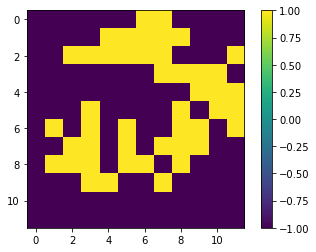

In [99]:
plt.imshow(np.sign((agts[0].Qtab[:,1]-agts[0].Qtab[:,0]).reshape(12,12)))
plt.colorbar(); # Full dataset up to 18-12-16-39 run

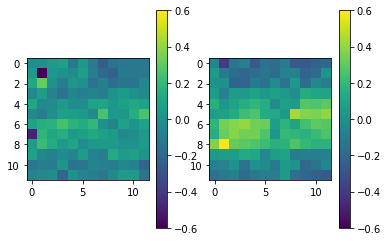

In [21]:
plot_qtabs(agts[0],vmin=-.6,vmax=.6) # Only nogap dataset

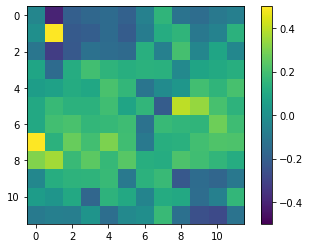

In [23]:
plt.imshow((agts[0].Qtab[:,1]-agts[0].Qtab[:,0]).reshape(12,12),vmin=-.5,vmax=.5)
plt.colorbar(); # Only nogap dataset

In [93]:
def test_model(lnr):
    # Tests det, random, known, on/off policies with a learner.
    def det_pol(stt):
        if stt==-1:
            return 1
        else:
            return 0
    def rand_pol(stt):
        return np.random.choice(2)
    def on_pol(stt):
        return 1
    def off_pol(stt):
        return 0

    def check_w_pol(lnr,pol):
        # Checking model
        rews = []
        act=0
        for n in range(100000):
            obs,r,done,_ = lnr.env.step(act)
            rews.append(r)
            obs = lnr.env.obs2grid(obs)
            stt = np.sign(obs[0]*obs[1])
            act = pol(stt)
        return np.mean(np.array(rews))
    on_rew = check_w_pol(lnr,on_pol)
    off_rew = check_w_pol(lnr,off_pol)
    rand_rew = check_w_pol(lnr,rand_pol)
    det_rew = check_w_pol(lnr,det_pol)
    print(f'On: {on_rew}, Off: {off_rew},\nRand: {rand_rew}, Det: {det_rew}')

In [94]:
test_model(lnr) # reward_ahead 10, gap 1, prev 1

On: 0.749337770790846, Off: 0.37374631722776014,
Rand: 0.5438454005201985, Det: 0.5095369184335135


## Results from HP tests for model-making
#### test_model(lnr) # No processing
On: 0.07669156598954022, Off: 0.04929583411227577,\
Rand: 0.06074955579469217, Det: 0.05731690314858038
        
#### test_model(lnr) # 10 steps reward lookahead, gap 1, 
On: 0.8939855232918641, Off: 0.5302931954327639,\
Rand: 0.6735411459013897, Det: 0.6793015644333945
        
#### test_model(lnr) # 30 steps reward lookahead 
On: 0.860152901466251, Off: 0.49147971027110354,\
Rand: 0.7023834607293573, Det: 0.6863384434872777

#### test_model(lnr) # reward_ahead 10, timestep gap 3, prev_act 3
On: 0.07612109365464763, Off: 0.03910300685651397,\
Rand: 0.06280830157912197, Det: 0.05794496432762597
        
#### test_model(lnr) # reward_ahead 3, timestep gap 3, prev_act 1
On: 0.08293510103927765, Off: 0.0433332076661735,\
Rand: 0.0617838689966751, Det: 0.055227570297238765
        
#### test_model(lnr) # lookahead 30, timestep gap 15, prev act 3
On: 0.08552243508587153, Off: 0.044970008511628565,\
Rand: 0.062000246658720205, Det: 0.05802177868445361
        
#### test_model(lnr) # lookahead 10, timestep gap 3, prev act 1
On: 0.0803129595913852, Off: 0.04610856627533537,\
Rand: 0.06724538492705232, Det: 0.051951764797169224

#### test_model(lnr) # lookahead 10, gap 1, prev 3
On: 0.08135043261924636, Off: 0.044970375586748094,\
Rand: 0.06009907475070151, Det: 0.058904984855335935

#### test_model(lnr) # lookahead 10, gap 1, prev 1 WITH DATA UP TO 18-12-16-39
On: 0.749337770790846, Off: 0.37374631722776014,\
Rand: 0.5438454005201985, Det: 0.5095369184335135

#### test_model(lnr) # lookahead 10, gap 1, prev 3 WITH DATA UP TO 18-12-16-39
On: 0.8090701813945474, Off: 0.4414222892325607,\
Rand: 0.5788897659546194, Det: 0.5564637323909659

# 1. Multiple models, individual agents which are then averaged.

# 2. Multiple models, each agent trains on the entire ensemble, multiple agent seeds. Agents then averaged.

# 3. One model with multiple agent seeds, then averaged.